In [38]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# 1. Density Estimation

### This is my sample data

In [42]:
actual_data = [5, 12, 22, 400, 800, 120, 70, 30, 23, 22, 10, 1 ]

### Fitting a Beta Distribution to the data

In [34]:
actual_a, actual_b, actual_loc, actual_scale = beta.fit(actual_data)

print('Beta distribution parameters are', actual_a, actual_b, actual_loc, actual_scale)

Beta distribution parameters are 0.13941265318308266 0.49629629823818583 0.9999999999999999 832.731192541219


In [35]:
synthetic_data_beta = beta.rvs(actual_a, actual_b ,loc=actual_loc,scale=actual_scale,size=len(actual_data))

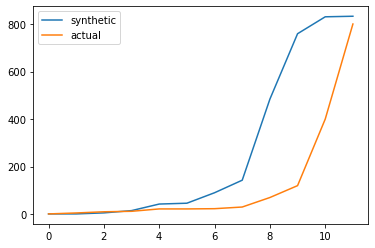

In [36]:
plt.plot(sorted(synthetic_data_beta), label='synthetic')
plt.plot(sorted(actual_data), label='actual')
plt.legend()
plt.show()

### Kernel density estimation

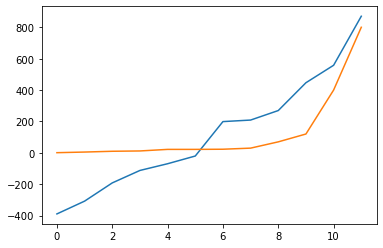

In [37]:


kernel = stats.gaussian_kde(actual_data, bw_method='silverman') # or try scott, or numeric 1, 2
synthetic_kde_data = kernel.resample(len(actual_data))


plt.plot(sorted(synthetic_kde_data[0]), label='synthetic')
plt.plot(sorted(actual_data), label='actual')
plt.show()

# 2. Covariance and Correlation

Covariance = measure if elements from two arrays move in the same direction

correlation = normalized covariance (always between -1 and 1)

In [43]:
print(actual_data)

[5, 12, 22, 400, 800, 120, 70, 30, 23, 22, 10, 1]


In [63]:
correlation_dict = {'Speed': sorted(actual_data), 
                      'Age': np.sort(actual_data)[::-1] } 

df = pd.DataFrame.from_dict(negative_corr_dict) 

In [64]:
print(df.head(len(actual_data)))

    speed  age
0       1  800
1       5  400
2      10  120
3      12   70
4      22   30
5      22   23
6      23   22
7      30   22
8      70   12
9     120   10
10    400    5
11    800    1


In [65]:
print(' Correlation matrix = ', df.corr().values)
print(type(df.corr().values))

 Correlation matrix =  [[ 1.         -0.28421951]
 [-0.28421951  1.        ]]
<class 'numpy.ndarray'>


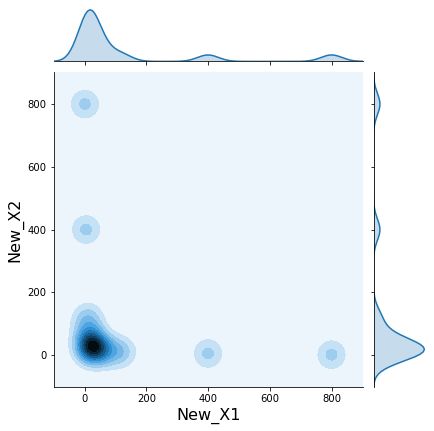

In [66]:

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);

In [52]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=negative_df.corr().values)
# Generate random samples from multivariate normal with correlation .5
x = mvnorm.rvs(10000)

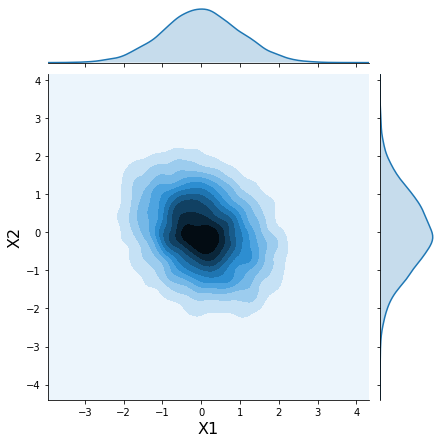

In [53]:
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

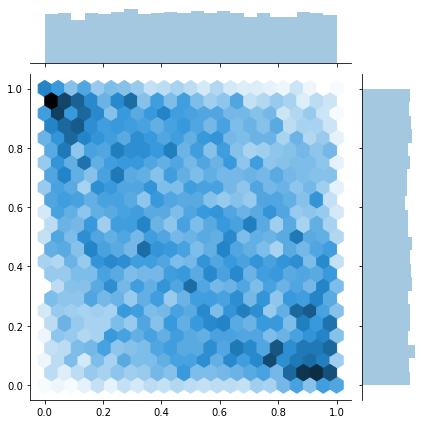

In [54]:
norm = stats.norm()
x_unif = norm.cdf(x)

h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)

In [67]:
age_distribution = stats.beta(a=actual_a, b=actual_b)  # Age column
speed_distribution = stats.beta(a=actual_a, b=actual_b)  # Speed column

In [68]:
age_ppf = age_distribution.ppf(x_unif[:, 0])
speed_ppf = speed_distribution.ppf(x_unif[:, 1])

In [69]:
synthetic_df = pd.DataFrame({'synthetic_age' : age_ppf, 'synthetic_speed' : speed_ppf})

In [70]:
print(synthetic_df.corr().values)

[[ 1.         -0.18712147]
 [-0.18712147  1.        ]]


In [71]:
print(synthetic_df.head())

   synthetic_age  synthetic_speed
0       0.133847     2.049770e-04
1       0.037081     5.564926e-07
2       0.046790     1.673178e-02
3       0.636001     9.130400e-14
4       0.002346     1.608040e-01


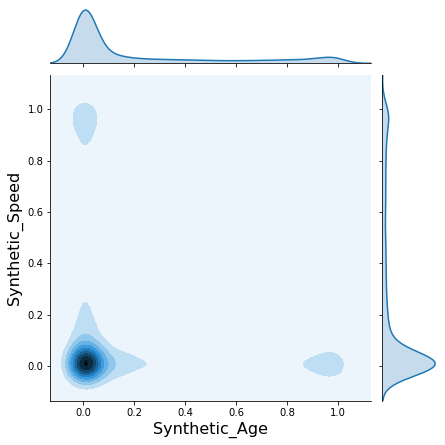

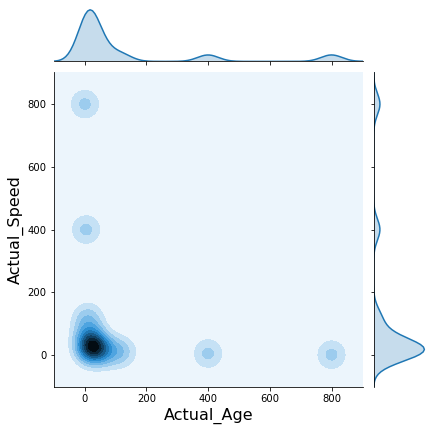

In [73]:

h = sns.jointplot(age_ppf, speed_ppf, kind='kde', stat_func=None);
h.set_axis_labels('Synthetic_Age', 'Synthetic_Speed',  fontsize=16);


h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);